# Data Understanding & Data Preparation

### Import Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

client = 'TOOL_CLIENT.csv'
sales  = 'TOOL_SALES.csv'
joint = 'TOOL_JOINT.csv'

In [2]:
df_client = pd.read_csv(client)
df_sales = pd.read_csv(sales)

df = pd.merge(df_client, df_sales, on='CLIENT_ID')
df.head()

/tmp/ipykernel_52482/2377162878.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sales = pd.read_csv(sales)


,CLIENT_ID,CLIENT_CREATE DATE,REGION,TRADE SECTOR,N_EMPLOYEES,ECONOMIC_POT,ECO_POT_CLASS,RISK_CAT,YYYYMM,ITEM_ID,FLG_TOOL,SALES_CHANNEL,NET,UNIT,FAMILY_CODE,GROUP_CODE,CANCELLED
0,9306,2005-11-15 00:00:00,BZ,11000,6,8659.81,D,3d,201709,12585,0,C,937.94,P,XBXV2EB,XBXV2EB0102,NaN
1,9306,2005-11-15 00:00:00,BZ,11000,6,8659.81,D,3d,201709,13431,0,C,641.09,P,XBXV2AB,XBXV2AB0102,NaN
2,9306,2005-11-15 00:00:00,BZ,11000,6,8659.81,D,3d,201709,1380,0,C,0.00,P,XBXV2EB,XBXV2EB0102,NaN
3,9306,2005-11-15 00:00:00,BZ,11000,6,8659.81,D,3d,202010,3493,1,C,1341.14,P,XBXV1AF,XBXV1AF0201,NaN
4,939,2005-11-15 00:00:00,LE,15500,2,681.26,E,3d,201705,8241,0,B,64.51,P,XAES4AA,XAES4AA0101,X


In [31]:
df_client.describe()

,CLIENT_ID,TRADE SECTOR,N_EMPLOYEES,ECONOMIC_POT
count,93257.000000,93257.000000,93257.000000,93257.000000
mean,46629.000000,17519.569577,5.428483,4942.023531
std,26921.121364,8769.651973,48.498675,2993.796073
min,1.000000,10000.000000,1.000000,0.000000
25%,23315.000000,11000.000000,1.000000,2264.230000
50%,46629.000000,13500.000000,3.000000,4528.530000
75%,69943.000000,21100.000000,5.000000,7528.520000
max,93257.000000,42500.000000,10000.000000,21069.210000


In [32]:
df_client.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93257 entries, 0 to 93256
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CLIENT_ID           93257 non-null  int64  
 1   CLIENT_CREATE DATE  93257 non-null  object 
 2   REGION              91276 non-null  object 
 3   TRADE SECTOR        93257 non-null  int64  
 4   N_EMPLOYEES         93257 non-null  int64  
 5   ECONOMIC_POT        93257 non-null  float64
 6   ECO_POT_CLASS       93257 non-null  object 
 7   RISK_CAT            93257 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 5.7+ MB


In [3]:
# lower case and replace spaces with underscores in column names
original_columns = df.columns
renamed_columns = [col.lower().replace(" ", "_") for col in original_columns]
column_mapping = dict(zip(original_columns, renamed_columns))
df.rename(columns=column_mapping, inplace=True)

df.head()

,client_id,client_create_date,region,trade_sector,n_employees,economic_pot,eco_pot_class,risk_cat,yyyymm,item_id,flg_tool,sales_channel,net,unit,family_code,group_code,cancelled
0,9306,2005-11-15 00:00:00,BZ,11000,6,8659.81,D,3d,201709,12585,0,C,937.94,P,XBXV2EB,XBXV2EB0102,NaN
1,9306,2005-11-15 00:00:00,BZ,11000,6,8659.81,D,3d,201709,13431,0,C,641.09,P,XBXV2AB,XBXV2AB0102,NaN
2,9306,2005-11-15 00:00:00,BZ,11000,6,8659.81,D,3d,201709,1380,0,C,0.00,P,XBXV2EB,XBXV2EB0102,NaN
3,9306,2005-11-15 00:00:00,BZ,11000,6,8659.81,D,3d,202010,3493,1,C,1341.14,P,XBXV1AF,XBXV1AF0201,NaN
4,939,2005-11-15 00:00:00,LE,15500,2,681.26,E,3d,201705,8241,0,B,64.51,P,XAES4AA,XAES4AA0101,X


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050449 entries, 0 to 2050448
Data columns (total 17 columns):
 #   Column              Dtype  
---  ------              -----  
 0   client_id           int64  
 1   client_create_date  object 
 2   region              object 
 3   trade_sector        int64  
 4   n_employees         int64  
 5   economic_pot        float64
 6   eco_pot_class       object 
 7   risk_cat            object 
 8   yyyymm              int64  
 9   item_id             int64  
 10  flg_tool            int64  
 11  sales_channel       object 
 12  net                 float64
 13  unit                object 
 14  family_code         object 
 15  group_code          object 
 16  cancelled           object 
dtypes: float64(2), int64(6), object(9)
memory usage: 265.9+ MB


In [5]:
df.describe()

,client_id,trade_sector,n_employees,economic_pot,yyyymm,item_id,flg_tool,net
count,2.050449e+06,2.050449e+06,2.050449e+06,2.050449e+06,2.050449e+06,2.050449e+06,2.050449e+06,2.050449e+06
mean,4.085241e+04,1.680062e+04,5.811620e+00,6.042201e+03,2.018903e+05,6.152528e+03,3.593223e-01,1.168498e+02
std,2.428800e+04,7.528669e+03,3.789158e+01,3.006802e+03,1.428000e+02,4.524401e+03,4.798019e-01,2.273342e+02
min,1.000000e+00,1.000000e+04,1.000000e+00,0.000000e+00,2.017010e+05,1.000000e+00,0.000000e+00,-1.313297e+04
25%,1.997500e+04,1.100000e+04,2.000000e+00,3.047920e+03,2.018010e+05,2.470000e+03,0.000000e+00,1.368000e+01
50%,4.046800e+04,1.350000e+04,3.000000e+00,6.038040e+03,2.019030e+05,4.815000e+03,0.000000e+00,4.909000e+01
75%,5.997900e+04,2.110000e+04,5.000000e+00,8.659810e+03,2.020090e+05,1.007700e+04,1.000000e+00,1.357800e+02
max,9.325700e+04,4.250000e+04,1.000000e+04,2.106921e+04,2.021120e+05,1.458100e+04,1.000000e+00,5.954192e+04


In [6]:
# converting date columns to datetime
df['client_create_date'] = pd.to_datetime(df['client_create_date'])
df['yyyymm'] = pd.to_datetime(df['yyyymm'].astype(str), format='%Y%m')

# converting other columns to appropriate data types
df['client_id'] = df['client_id'].astype(str)
df['cancelled'] = df['cancelled'] == 'X'
df['unit'] = df['unit'] == 'P'

In [7]:
# creating a new column for identifie the unique sales
df['sales_id'] = df['client_id'].astype(str) + '_' + df['yyyymm'].dt.strftime('%Y%m')

df.head()

,client_id,client_create_date,region,trade_sector,n_employees,economic_pot,eco_pot_class,risk_cat,yyyymm,item_id,flg_tool,sales_channel,net,unit,family_code,group_code,cancelled,sales_id
0,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,12585,0,C,937.94,True,XBXV2EB,XBXV2EB0102,False,9306_201709
1,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,13431,0,C,641.09,True,XBXV2AB,XBXV2AB0102,False,9306_201709
2,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,1380,0,C,0.00,True,XBXV2EB,XBXV2EB0102,False,9306_201709
3,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2020-10-01,3493,1,C,1341.14,True,XBXV1AF,XBXV1AF0201,False,9306_202010
4,939,2005-11-15,LE,15500,2,681.26,E,3d,2017-05-01,8241,0,B,64.51,True,XAES4AA,XAES4AA0101,True,939_201705


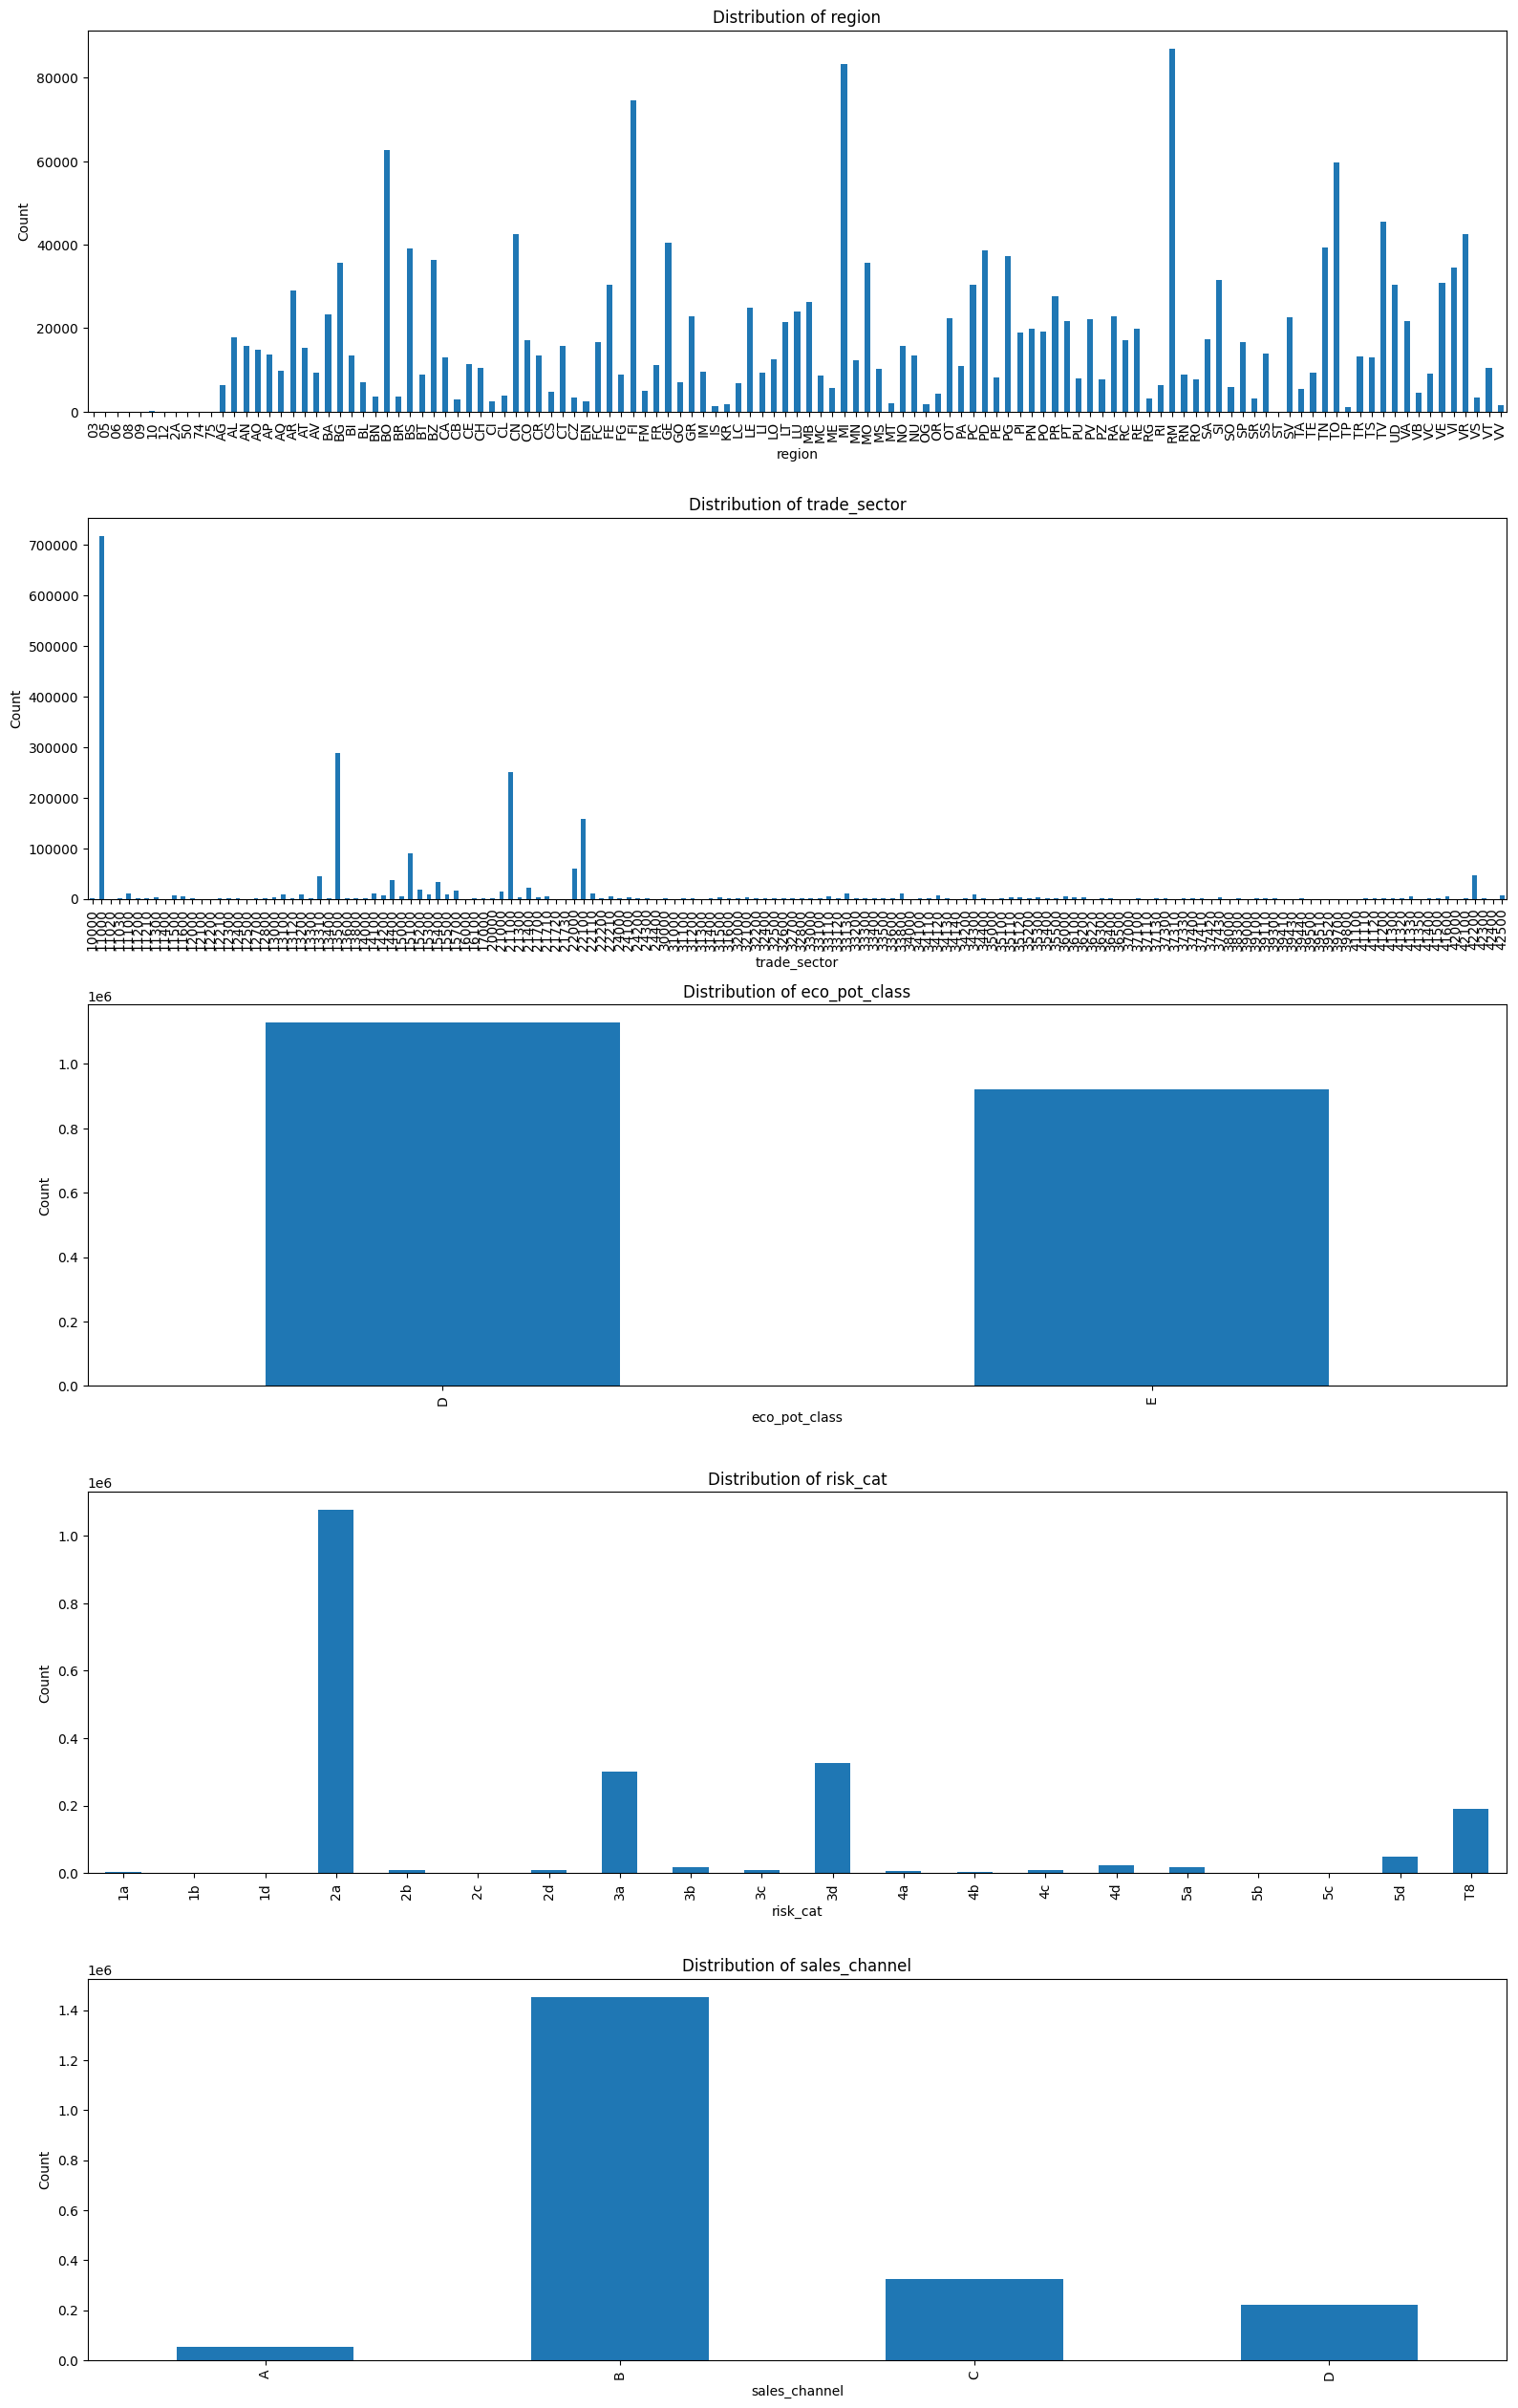

In [ ]:
# Identify categorical columns (adjust if needed)
categorical_cols = [
    "region",
    "trade_sector",
    "eco_pot_class",
    "risk_cat",
    "sales_channel"
]

# Set number of subplots
n = len(categorical_cols)
ncols = 1
nrows = (n + 1) // ncols

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 5 * nrows))

# Flatten axes array for easier indexing
axes = axes.flatten()

# Loop through columns and plot
for i, col in enumerate(categorical_cols):
    df[col].value_counts().sort_index().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # removes empty axes

plt.tight_layout()
plt.show()

In [13]:
# Original shape before transformation
df.shape

(2050449, 18)

In [14]:
# adding new variables to the main dataframe
n_purchases = df.groupby('client_id')['sales_id'].nunique()   # counting unique sales for each client
sales_net = df.groupby('sales_id')['net'].sum()   # summarizing the net sales by sales_id

# merging the new variables to the main dataframe
df['n_purchases'] = df['client_id'].map(n_purchases)   # adding the number of purchases
df['sales_net'] = df['sales_id'].map(sales_net)   # adding the net sales

In [17]:
df["sales_id"].nunique()

464355

In [15]:
df.shape

(2050449, 20)

In [18]:
df['time_diff'] = df.sort_values(['client_id', 'yyyymm']) \
                    .groupby('client_id')['yyyymm'] \
                    .diff().dt.days

In [21]:
df['time_diff'] = df['time_diff'].fillna(-1)

<Axes: >

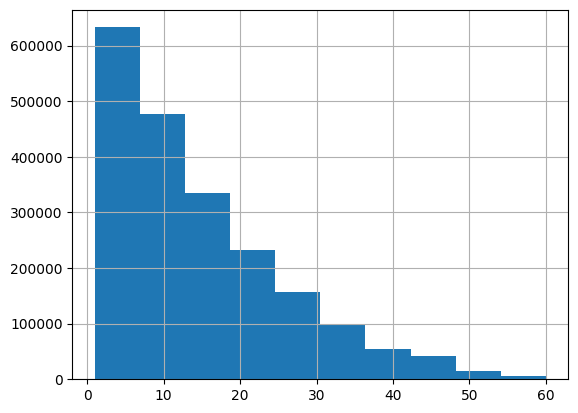

In [22]:
df['n_purchases'].hist()

In [23]:
df.shape

(2050449, 21)

In [24]:
df['unit'].value_counts()

unit
True     2035647
False      14802
Name: count, dtype: int64

In [ ]:
# Analysis with cancelled orders
filtered = df.query("cancelled == 1 and n_purchases >= 2")
count = filtered.shape[0]
print(f"Number of cancelled customers with more than 2 purchases: {count}")

In [25]:
df_model = df.copy()   # creating a copy of the main dataframe for modeling

# dropping columns that are not needed for modeling
df_model.drop(df_model[df_model['unit'] == False].index, inplace=True)   # dropping the canceled orders
df_model.drop('unit', axis=1, inplace=True)    # dropping the canceled column
df_model.drop(df_model[df_model['cancelled'] == True].index, inplace=True)   # dropping the canceled orders
df_model.drop('cancelled', axis=1, inplace=True)    # dropping the canceled column

df_model.head(10)

,client_id,client_create_date,region,trade_sector,n_employees,economic_pot,eco_pot_class,risk_cat,yyyymm,item_id,flg_tool,sales_channel,net,family_code,group_code,sales_id,n_purchases,sales_net,time_diff
0,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,12585,0,C,937.94,XBXV2EB,XBXV2EB0102,9306_201709,2,1579.03,-1.0
1,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,13431,0,C,641.09,XBXV2AB,XBXV2AB0102,9306_201709,2,1579.03,0.0
2,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,1380,0,C,0.00,XBXV2EB,XBXV2EB0102,9306_201709,2,1579.03,0.0
3,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2020-10-01,3493,1,C,1341.14,XBXV1AF,XBXV1AF0201,9306_202010,2,1341.14,1126.0
7,8321,2005-11-15,LE,15500,2,681.26,E,T8,2018-04-01,6776,0,B,20.02,XBSI4AA,XBSI4AA0101,8321_201804,7,20.02,-1.0
8,8321,2005-11-15,LE,15500,2,681.26,E,T8,2018-05-01,8666,0,B,5.96,XAEG4AA,XAEG4AA0101,8321_201805,7,5.96,30.0
9,8321,2005-11-15,LE,15500,2,681.26,E,T8,2019-08-01,8662,0,B,22.26,XAEG4AA,XAEG4AA0101,8321_201908,7,22.26,457.0
10,8321,2005-11-15,LE,15500,2,681.26,E,T8,2019-12-01,12478,1,B,117.65,XAES2AC,XAES2AC0201,8321_201912,7,117.65,122.0
11,8321,2005-11-15,LE,15500,2,681.26,E,T8,2020-05-01,7187,0,B,10.08,XAEG4AA,XAEG4AA0101,8321_202005,7,10.08,152.0
12,8321,2005-11-15,LE,15500,2,681.26,E,T8,2021-07-01,6776,0,B,22.74,XBSI4AA,XBSI4AA0101,8321_202107,7,22.74,426.0


In [26]:
df_model.shape

(1933899, 19)

<Axes: >

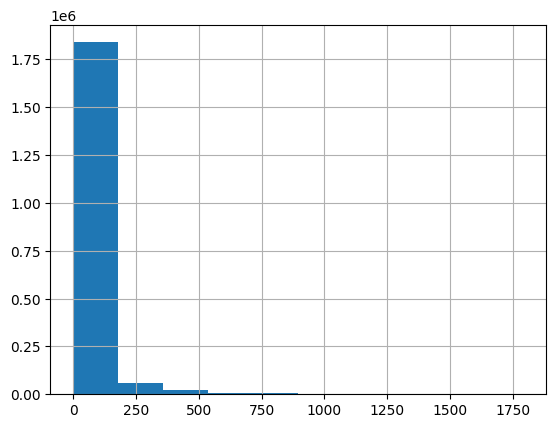

In [27]:
df_model['time_diff'].hist()

In [28]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1933899 entries, 0 to 2050448
Data columns (total 19 columns):
 #   Column              Dtype         
---  ------              -----         
 0   client_id           object        
 1   client_create_date  datetime64[ns]
 2   region              object        
 3   trade_sector        int64         
 4   n_employees         int64         
 5   economic_pot        float64       
 6   eco_pot_class       object        
 7   risk_cat            object        
 8   yyyymm              datetime64[ns]
 9   item_id             int64         
 10  flg_tool            int64         
 11  sales_channel       object        
 12  net                 float64       
 13  family_code         object        
 14  group_code          object        
 15  sales_id            object        
 16  n_purchases         int64         
 17  sales_net           float64       
 18  time_diff           float64       
dtypes: datetime64[ns](2), float64(4), int64(5), obj

In [29]:
# creating the target variable
df_model['target'] = np.where(df_model['time_diff'] > 730, 1, 0)
df_model.head(5)

,client_id,client_create_date,region,trade_sector,n_employees,economic_pot,eco_pot_class,risk_cat,yyyymm,item_id,flg_tool,sales_channel,net,family_code,group_code,sales_id,n_purchases,sales_net,time_diff,target
0,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,12585,0,C,937.94,XBXV2EB,XBXV2EB0102,9306_201709,2,1579.03,-1.0,0
1,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,13431,0,C,641.09,XBXV2AB,XBXV2AB0102,9306_201709,2,1579.03,0.0,0
2,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,1380,0,C,0.00,XBXV2EB,XBXV2EB0102,9306_201709,2,1579.03,0.0,0
3,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2020-10-01,3493,1,C,1341.14,XBXV1AF,XBXV1AF0201,9306_202010,2,1341.14,1126.0,1
7,8321,2005-11-15,LE,15500,2,681.26,E,T8,2018-04-01,6776,0,B,20.02,XBSI4AA,XBSI4AA0101,8321_201804,7,20.02,-1.0,0


In [30]:
df_model['target'].value_counts()

target
0    1923922
1       9977
Name: count, dtype: int64

In [ ]:
df_model.drop(df_model[df_model['time_diff_next'] < 730].index, inplace=True)  # dropping the sales with less than 2 years between them
df_model.head(5)

In [33]:
df_model.shape

(1933899, 20)

In [34]:
df_model.to_csv('DF_ModelH.csv', index=False)   # saving the model dataframe to a csv file